In [1]:
#The Human Reference Protein Interactome Mapping Project
#http://www.interactome-atlas.org/download
#Dataset Venkatesan-09
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import networkx as nx
import time
import pandas as pd
import os

In [2]:
os.chdir('C:/Users/Izzy/Downloads')
os.getcwd()

'C:\\Users\\Izzy\\Downloads'

In [3]:
#Read file
path_file='output-onlinetsvtoolsnums.txt'
edge_list=pd.read_csv('output-onlinetsvtoolsnums.txt', delimiter = ' ' ,names=['source','target'])

In [4]:
edge_list[:10]

,source,target
0,2834,71539
1,2834,112559
2,2834,183283
3,6015,112559
4,11007,265817
5,30110,171552
6,31691,132016
7,50748,141480
8,51128,108798
9,58673,76242


In [5]:
#Start with same analysis as in lecture.
#read entire edge list
start=time.time()
G = nx.read_edgelist(path_file)
print(time.time()-start)

0.0029299259185791016


In [6]:
#here we look for the degree of each node.
#we use a dictionary
start=time.time()
degrees={}
for i in edge_list.iterrows():
    if i[1].source not in degrees:
        degrees[i[1].source]=0
    if i[1].target not in degrees:
        degrees[i[1].target]=0
    degrees[i[1].source]+=1
    degrees[i[1].target]+=1
print(time.time()-start)

0.03941631317138672


In [7]:
degree_sequence=list(degrees.values())

In [8]:
#Using networkX
degree_sequence_nx=[d for n,d in G.degree()]

In [9]:
xx,countss=np.unique(degree_sequence,return_counts=True)

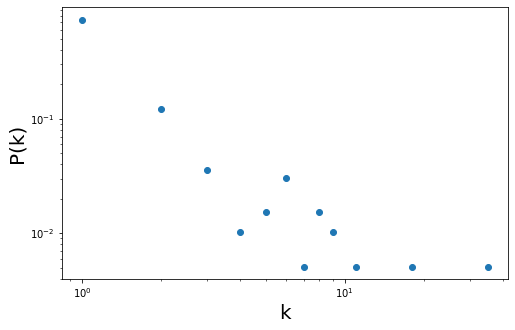

In [10]:
#Plot degree distribution
plt.figure(figsize=(8,5))
plt.loglog(xx,countss/sum(countss),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

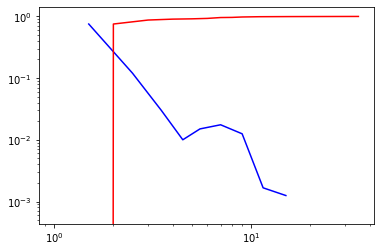

In [11]:
#Plot probability density function and cumulative distribution function
powerlaw.plot_pdf(degree_sequence_nx, color='b') #pdf in blue
powerlaw.plot_cdf(degree_sequence_nx, color='r') #cdf in red

In [12]:
#calculate scaling exponent alpha (gamma) and x_min (k_min)
fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
alpha=fit.alpha
print('scaling exponent',alpha)
k_min=fit.xmin
print('k_min',k_min)

scaling exponent 2.173435506402618
k_min 2.0


Calculating best minimal value for power law fit
C:\Users\Izzy\miniconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [13]:
#for multiple synthetic distributions with same alpha/gamma and kmin/xmin,
#count number of total distributions n, and 
#number of times t synthetic distribution has higher KS statistic than empirical data.
#p = t/n

n=0
t=0
for i in range(100):
    theoretical_distribution = powerlaw.Power_Law(xmin=2.0, parameters=[2.173435506402618], discrete=True)
    simulated_data = theoretical_distribution.generate_random(176)
    fit2 = powerlaw.Fit(simulated_data, discrete=True, estimate_discrete=True)
    n+=1
    print(fit2.D)
    if fit2.D > fit.D:
        t+=1

p=t/n
print('p value = ', p)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
C:\Users\Izzy\miniconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calcu

0.05032262607888882
0.02620371449304043
0.035353774233105706
0.04144398936203664
0.0441982878210444
0.02354130528126952
0.040916100344860484
0.03512585317292377
0.0411906314135877
0.04020359091967507
0.046660477297221004
0.03855366153021933
0.04195801686382672
0.02028582679019686
0.05260618539597639
0.031314712073137074
0.02373964288991748
0.03699926909548684
0.02674951076493437
0.04590850936984203
0.03704237437379254
0.029434233443296764
0.05407353635800449
0.06610148432554941
0.05798580882874532
0.0549634092261716
0.037079779210694164


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.050892125924416665
0.027453333289634785
0.05590652855420444
0.07714654801235288
0.05507267278333072
0.08380702996073919

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.0560165055467432
0.0491572930689933
0.06157030845112588
0.04401467591362784
0.08081066354604427
0.03111432006856829
0.036044208399221234
0.03406369131397091
0.05015534545879946
0.07040655317170452
0.02370422276385864
0.046714735156335896
0.035745407960882214
0.04560541609276181
0.052662556224541746
0.0397667611993473
0.054609789669932574
0.04779294400630196
0.047791538708881975

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.04673963517828572
0.03324301254521944
0.0342832905190219
0.02475170300881313
0.0665398221206488
0.04063189320858274
0.06270508868999758
0.053734412862935566
0.05746398434778671
0.03925332145478144

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min


0.05567432503500758
0.06385246160894598
0.046111762936770884
0.06108156922923491
0.044079027930870596
0.06835921235950099
0.040009962301615465
0.05382651012367179
0.02552007394960798
0.033982154158341826
0.035211983441993944
0.05575370890290804
0.035263132951782294
0.04482994060023382
0.05179161397084642
0.056414863720018915
0.031090535758675042
0.023941937633255528
0.03160540622336805
0.044530031802573755
0.03581005133229509
0.037131345167512375
0.02567143347069689
0.028754330976107245
0.04743378754417166


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.030820252088999855
0.04870672500171014
0.06824642309085643
0.03649343943782313
0.04628949128349835
0.04638552535102791
0.02458099630112298
0.01982018569365096
0.03979239000572088
0.04690921773150636
0.07303313832265229
0.05245793591345771
0.0862866529543968
p value =  0.04


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [14]:
#compare fit of power law vs exponential. Positive R (loglikelihood ratio) means data is more likely in first distribution,
#while negative R means data is more likely in the second. The significance value for that direction is p.
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("Loglikelihood ratio: ", R, "\nSignificance value: ", p)

Loglikelihood ratio:  0.9574329668840056 
Significance value:  0.3383487654551026


In [15]:
#Read larger file, dataset Yang-16
path_file2='Yang-16.txt'
edge_list2=pd.read_csv('Yang-16.txt', delimiter = ' ' , names=['source','target'])

In [16]:
edge_list2[:10]

,source,target
0,2330,171552
1,2822,140416
2,3756,5102
3,3756,106511
4,5102,68305
5,5102,172530
6,5102,181513
7,5249,108599
8,7001,7001
9,7001,106511


In [17]:
#Start with same analysis as in lecture.
#read entire edge list
G2 = nx.read_edgelist(path_file2)

In [18]:
#here we look for the degree of each node.
#we use a dictionary
degrees2={}
for i in edge_list2.iterrows():
    if i[1].source not in degrees2:
        degrees2[i[1].source]=0
    if i[1].target not in degrees2:
        degrees2[i[1].target]=0
    degrees2[i[1].source]+=1
    degrees2[i[1].target]+=1

In [19]:
degree_sequence2=list(degrees2.values())

In [20]:
#Using networkX
degree_sequence_nx2=[d for n,d in G2.degree()]

In [21]:
xx2,countss2=np.unique(degree_sequence2,return_counts=True)

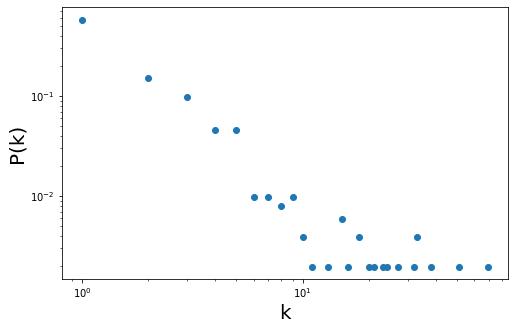

In [22]:
#Plot degree distribution
plt.figure(figsize=(8,5))
plt.loglog(xx2,countss2/sum(countss2),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

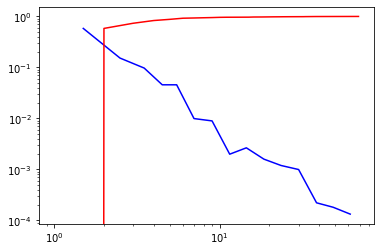

In [23]:
#Plot probability density function and cumulative distribution function
powerlaw.plot_pdf(degree_sequence_nx2, color='b') #pdf in blue
powerlaw.plot_cdf(degree_sequence_nx2, color='r') #cdf in red

In [24]:
#calculate scaling exponent alpha (gamma) and x_min (k_min)
fitt = powerlaw.Fit(degree_sequence_nx2, discrete=True)
alphaa=fitt.alpha
print('scaling exponent',alphaa)
k_minn=fitt.xmin
print('k_min',k_minn)

scaling exponent 2.3341998795884913
k_min 3.0


Calculating best minimal value for power law fit
C:\Users\Izzy\miniconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [25]:
#for multiple synthetic distributions with same alpha/gamma and kmin/xmin,
#count number of total distributions n, and 
#number of times t synthetic distribution has higher KS statistic than empirical data.
#p = t/n

n=0
t=0
for i in range(100):
    theoretical_distribution2 = powerlaw.Power_Law(xmin=3.0, parameters=[2.3341998795884913], discrete=True)
    simulated_data2 = theoretical_distribution2.generate_random(727)
    fitt2 = powerlaw.Fit(simulated_data2, discrete=True, estimate_discrete=True)
    n+=1
    print(fitt2.D)
    if fitt2.D > fitt.D:
        t+=1

p=t/n
print('p value = ', p)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
C:\Users\Izzy\miniconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.03136754841704992
0.03178239715211928
0.01578540542403628
0.021099473932273516
0.02238560030062342
0.017479332219545174
0.028116937783092655
0.03210656854861782
0.016391499629872852
0.020927306974150794
0.02200354239199742


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.015609698786959059
0.019420939091234102
0.03133993548091618
0.032033438706362105
0.01340711103608605
0.023333268412715658
0.02684512339927292

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.03261415102894394
0.023005064466168235
0.039111040391190066
0.020197010916082392
0.024569385584012504
0.040946816176834155
0.022433701844083886

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.03471684842346345
0.05043056970036108
0.021973739911723356
0.0354867689527254
0.026321906085004843
0.019113235692877706

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.020317834226979636
0.02092771817734118
0.024190960276172402
0.03468785339757985
0.02263897771292389
0.023943008562521406
0.02169188776445674
0.017120399761622607
0.014002198856400971

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.03136942406123744
0.033856938334658304
0.0157184511326387
0.03169907294331531
0.016684844296075307
0.034197107316075726

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.02443725248150741
0.01546200413184462
0.02233672650419316
0.03222949831284172
0.01601240341901372
0.025461268767060563
0.04928616558514726
0.026752793919195106
0.024930554326846044

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.010264882390318641
0.021089681288542272
0.02107057964450343
0.029061613153559873
0.022801656616953547
0.03543588341558235

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.029012614225804145
0.014663108954760085
0.020384520157304076
0.025568986947402728
0.02896241873012384
0.019588515784886185
0.018406728813907924


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.0263367388074065
0.04219199653899386
0.01920642718445248
0.024771460949649438
0.03521062356677973
0.015214455246621572


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.021995807964084735
0.03391022552922218
0.01930963111345063
0.020986620785741206
0.014735627645311666
0.03103961309525899
0.024799096703975843
0.029009312596883607
0.01602230268507221
0.019845494673296882
0.026553823456469616

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.02334469809072337
0.026961669577098224
0.021676507512687904
0.024044717882524602
0.02735916452351206
0.022227887523694978

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



0.01820272823773067
0.024445866197460586
0.024894476106577135
0.03332430659442531
0.015934580026949835
0.02555139757359326
0.014765554742805942
0.021238848920023812
0.015609053467056433
p value =  0.0


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [26]:
#compare fit of power law vs exponential. Positive R (loglikelihood ratio) means data is more likely in first distribution,
#while negative R means data is more likely in the second. The significance value for that direction is p.
R, p = fitt.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("Loglikelihood ratio: ", R, "\nSignificance value: ", p)

Loglikelihood ratio:  3.4461343849732247 
Significance value:  0.0005686674905490583
